# Growth Analyst: Skills Assessment

Background:

Springboard would like to experiment with different payment options to determine which ones lead to highest student completion (and retention). There are two payment options under consideration:
1. Upfront: The student pays upfront for most or all of the course in return for a discount
2. Subscription: The student pays month-to-month for as long as they take to complete the course, with an option to cancel at any time

Our courses typically have two structures:
1. Fixed-length: Students have to finish the course in a fixed amount of time
2. Self-paced: Students can take as long as they like, and pay as they go

We have run a few different experiments in the past and have collected data around 3 of our courses. Here’s some context about each of these courses.

<img src='files/table_from_pdf.png'>

The option available from column indicates the cohort for which both payment options were available. We have cohorts starting approximately every month.

# Challenge
This [spreadsheet](https://docs.google.com/spreadsheets/d/1sHJ4ufoKtXXC83o-QsWBcs2ItncXHssIit2YGt-T_j8/edit) contains the data we collected over a few months for each of these courses. Your task is to use this data to recommend to Springboard which payment option (if any) is the better one. Here are some questions to help you guide your analysis:
1. Do you have any hypotheses around why the choice of payment option (upfront or subscription) should be correlated to completion rates?
2. Can you summarize and visualize the data in a compact manner, preferably in as few charts as possible?
3. Can you draw any conclusions around whether one option is better than the other? Does the course structure play a role?
4. What recommendations would you make to Springboard as a business?
5. What are some questions you’d want to explore further or experiments that you’d recommend that Springboard runs?

# Deliverables
1. A short slide deck (fewer than 10 slides) summarizing your analysis
2. Your actual analysis (spreadsheet, code, etc). You can use any tools or languages of your choice.

Please treat this assignment as if you were a colleague, and feel free to email me any questions to validate your assumptions. Please state any assumptions you make clearly in your submission.

In [2]:
# Dependancies
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [3]:
data = pd.read_csv('files/springboard.csv')

In [4]:
list(data.columns)

['Course',
 'Metric',
 'Cohort',
 'Number_of_students',
 'Number_of_students_who_paid_upfront',
 'Number_of_students_who_paid_via_subscription',
 'Number_who_paid_upfront_and_\nsatisfy_Column_B',
 'Number_who_paid_via_subscription_and_\nsatisfy_Column_B']

In [4]:
# Rename columns, removing new line error.
data = data.rename(columns={'Number_who_paid_upfront_and_\nsatisfy_Column_B':'Number_who_paid_upfront_and_satisfy_Column_B','Number_who_paid_via_subscription_and_\nsatisfy_Column_B':'Number_who_paid_via_subscription_and_satisfy_Column_B',})

In [5]:
# Load in and look at the data.
data.head()

,Course,Metric,Cohort,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,Number_who_paid_upfront_and_satisfy_Column_B,Number_who_paid_via_subscription_and_satisfy_Column_B
0,DAB,4_month_completion,43102,26,21,5,11,1
1,DAB,4_month_completion,43130,26,18,8,11,2
2,DAB,4_month_completion,43158,29,19,10,8,4
3,DAB,3_month_completion,43102,26,21,5,9,1
4,DAB,3_month_completion,43130,26,18,8,7,1


In [6]:
# Quick description of data.
data.describe()

,Cohort,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,Number_who_paid_upfront_and_satisfy_Column_B,Number_who_paid_via_subscription_and_satisfy_Column_B
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,43157.045455,36.477273,13.522727,22.954545,9.681818,13.272727
std,38.447158,9.267319,5.828912,8.485157,5.853930,9.381733
min,43102.000000,20.000000,5.000000,5.000000,0.000000,0.000000
25%,43130.000000,33.500000,10.000000,18.000000,5.000000,4.000000
50%,43158.000000,38.000000,13.000000,26.000000,10.000000,12.500000
75%,43186.000000,39.000000,19.000000,29.000000,13.250000,19.500000
max,43249.000000,66.000000,25.000000,41.000000,24.000000,37.000000


In [7]:
# I created these functions based on the information provided on "table_from_pdf.png"
# These functions are seperate because I want to return a new value in a new column.

# For course type
def course_type(row):
    if row['Course'] == 'DAB':
        return 'Fixed_length'
    if row['Course'] in ['DS2','DSC']:
        return 'Self_paced'
    else:
        return 'none'

In [8]:
# For availability
def available(row):
    if row['Course'] in ['DAB','DSC']:
        return '2017-01-02'
    if row['Course'] == 'DS2':
        return '2017-01-30'
    else:
        return 'none'

In [9]:
# For default
def default(row):
    if row['Course'] == 'DAB':
        return 'Upfront'
    if row['Course'] in ['DS2','DSC']:
        return 'Subscription'
    else:
        return 'none'

In [10]:
# For description
def description(row):
    if row['Course'] == 'DSC':
        return 'Pay_Upfront_6Mon_20%Discount'
    if row['Course'] in ['DS2','DAB']:
        return 'Pay_Upfront_3Mon_10%Discount'
    else:
        return 'none'

In [11]:
# Applying functions to DataFrame
funcs = ['course_type','available','default','description']

for i in funcs:
    data[i] = data.apply(lambda row: eval(i)(row),axis=1)

In [12]:
# Look at the new columns
data.head()

,Course,Metric,Cohort,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,Number_who_paid_upfront_and_satisfy_Column_B,Number_who_paid_via_subscription_and_satisfy_Column_B,course_type,available,default,description
0,DAB,4_month_completion,43102,26,21,5,11,1,Fixed_length,2017-01-02,Upfront,Pay_Upfront_3Mon_10%Discount
1,DAB,4_month_completion,43130,26,18,8,11,2,Fixed_length,2017-01-02,Upfront,Pay_Upfront_3Mon_10%Discount
2,DAB,4_month_completion,43158,29,19,10,8,4,Fixed_length,2017-01-02,Upfront,Pay_Upfront_3Mon_10%Discount
3,DAB,3_month_completion,43102,26,21,5,9,1,Fixed_length,2017-01-02,Upfront,Pay_Upfront_3Mon_10%Discount
4,DAB,3_month_completion,43130,26,18,8,7,1,Fixed_length,2017-01-02,Upfront,Pay_Upfront_3Mon_10%Discount


In [13]:
# I wanted to group by various metrics to get a better feel for the data
data.drop([
    'Number_who_paid_upfront_and_satisfy_Column_B',
    'Number_who_paid_via_subscription_and_satisfy_Column_B']
    , axis=1
).groupby(
    ['Course',
     'Metric',
     'Cohort']
).sum()

Number_of_students  \
Course Metric             Cohort                       
DAB    3_month_completion 43102                   26   
                          43130                   26   
                          43158                   29   
                          43186                   28   
       4_month_completion 43102                   26   
                          43130                   26   
                          43158                   29   
DS2    1_month_retention  43130                   35   
                          43158                   39   
                          43186                   38   
                          43214                   38   
                          43249                   40   
       2_month_retention  43130                   35   
                          43158                   39   
                          43186                   38   
                          43214                   38   
       3_month_completion 43130                   35   
                          43158                   39   
                          43186                   38   
       3_month_retention  43130                   35   
                          43158                   39   
                          43186                   38   
       4_month_completion 43130                   35   
                          43158                   39   
       4_month_retention  43130                   35   
                          43158                   39   
DSC    1_month_retention  43102                   20   
                          43130                   38   
                          43158                   38   
                          43186                   49   
                          43214                   53   
                          43249                   66   
       2_month_retention  43102                   20   
                          43130                   38   
                          43158                   38   
                          43186                   49   
                          43214                   53   
       3_month_retention  43102                   20   
                          43130                   38   
                          43158                   38   
                          43186                   49   
       4_month_retention  43102                   20   
                          43130                   38   
                          43158                   38   

                                  Number_of_students_who_paid_upfront  \
Course Metric             Cohort                                        
DAB    3_month_completion 43102                                    21   
                          43130                                    18   
                          43158                                    19   
                          43186                                    20   
       4_month_completion 43102                                    21   
                          43130                                    18   
                          43158                                    19   
DS2    1_month_retention  43130                                     6   
                          43158                                    10   
                          43186                                    14   
                          43214                                    13   
                          43249                                    11   
       2_month_retention  43130                                     6   
                          43158                                    10   
                          43186                                    14   
                          43214                                    13   
       3_month_completion 43130                                     6   
                          43158                                    10 

In [14]:
# Students by course
data.drop(['Cohort'],axis=1).groupby(['Course']).sum()

,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,Number_who_paid_upfront_and_satisfy_Column_B,Number_who_paid_via_subscription_and_satisfy_Column_B
Course,,,,,
DAB,190,136,54,62,14
DS2,712,189,523,125,253
DSC,703,270,433,239,317


In [15]:
# By cohort, nothing came out of this, just wanted to look.
data.groupby('Cohort').sum()

,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,Number_who_paid_upfront_and_satisfy_Column_B,Number_who_paid_via_subscription_and_satisfy_Column_B
Cohort,,,,,
43102,132,62,70,37,43
43130,414,148,266,106,124
43158,444,146,298,96,133
43186,327,133,194,89,135
43214,182,70,112,63,86
43249,106,36,70,35,63


<b>1) Do you have any hypotheses around why the choice of payment option (upfront or subscription) should be correlated to completion rates?</b>

My initial hypothesis is that students who pay upfront are more inclined to finish the class. <b>This seems to be determined by the type of class.</b>

My reasoning:
- If there is a month by month payment students who are unhappy with the class may drop before completion.
- If someone were to pay the full amount they would feel more inclined to finish the class.

<b>After looking at the data:</b><br>
It turns out students who paid upfront actually had lower retention and completion rate for self-paced classes. Through 1 to 4 months, <b>monthly retention was an average of 33%</b> for upfront payers and <b>67% for those who paid via subscription</b>

As for completion it seems to have less of an effect. <b>Those who paid upfront had an average of 48% completion rate over 3 and 4 montsh versus 52% from those who paid by subscription.</b> Despite a lesser effect subscription payers still had beter completion rates. These numbers are more revealing when we take a look at these numbers grouped by class type.

Flexibility may be the key here. Although discounts are given through an upfront price, the choice to leave the class due to any circumstance gives a user freedom. This information can be used to start generalizing the user base at Springboard

<b>Numerical Observations:</b>
- The longer the class runs the less students finish. 1 month retention is much higher than 2 etc. as well, 3 month completion is also higher than 4 month.
- Students who paid upfront actually had lower retention and completion rate.
- Through 1 to 4 months, average monthly retention was an average of 33% for upfront payers and 67% for those who paid via subscription.
- 72% of fixed-length class users paid upfront. Versus 32% of users paying upfront for self-paced classes.
- 88% of users were in self-paced classes versus 12% in a fixed-length.
- Those who paid upfront had an average of 48% completion rate over 3 and 4 montsh versus 52% from those who paid by subscription.
- Users were most likely to pay via subscription even with the discount. A 20% discount did not make a significant differnece in attratcing users.

In [16]:
# This data can only be applied to self-paced clases. Fixed-length doesn't have these attributes.
# Count of students by rentention metrics
retention_paid = data[data['Metric'].str.contains('retention')].drop(
    ['Cohort',
     'Number_who_paid_upfront_and_satisfy_Column_B',
     'Number_who_paid_via_subscription_and_satisfy_Column_B'],
     axis=1
).groupby(
    ['Metric']
).sum().reset_index()

# Calculation percentage of those who paid upfront vs. those who paid via subscription
retention_paid['pct_upfront'] = retention_paid['Number_of_students_who_paid_upfront']/retention_paid['Number_of_students']
retention_paid['pct_sub'] = retention_paid['Number_of_students_who_paid_via_subscription']/retention_paid['Number_of_students']

retention_paid

,Metric,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,pct_upfront,pct_sub
0,1_month_retention,454,156,298,0.343612,0.656388
1,2_month_retention,348,120,228,0.344828,0.655172
2,3_month_retention,257,85,172,0.330739,0.669261
3,4_month_retention,170,52,118,0.305882,0.694118


In [17]:
# Average upfront monthly Retention
retention_paid['pct_upfront'].mean()

0.3312653933901825

In [18]:
# Average subscription monthly Retention
retention_paid['pct_sub'].mean()

0.6687346066098174

In [19]:
# Count of students by completion metrics
completetion = data[data['Metric'].str.contains('completion')].drop(
    ['Cohort','Number_who_paid_upfront_and_satisfy_Column_B',
     'Number_who_paid_via_subscription_and_satisfy_Column_B']
    ,axis=1
).groupby(
    ['Metric']
).sum().reset_index()

# Calculation percentage of those who paid upfront vs. those who paid via subscription
completetion['pct_upfront'] = completetion['Number_of_students_who_paid_upfront']/completetion['Number_of_students']
completetion['pct_sub'] = completetion['Number_of_students_who_paid_via_subscription']/completetion['Number_of_students']

completetion

,Metric,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,pct_upfront,pct_sub
0,3_month_completion,221,108,113,0.488688,0.511312
1,4_month_completion,155,74,81,0.477419,0.522581


In [20]:
# Upfront completion average between 3 and 4 months
completetion['pct_upfront'].mean()

0.48305356882206973

In [21]:
# Subscription completion average between 3 and 4 months
completetion['pct_sub'].mean()

0.5169464311779302

In [22]:
# Users were most likely to pay via subscription even with the discount.
description_df = data.drop(
    ['Cohort','Number_who_paid_upfront_and_satisfy_Column_B',
     'Number_who_paid_via_subscription_and_satisfy_Column_B']
    ,axis=1
).groupby(
    'description'
).sum().reset_index()

# Calculation percentage of those who paid upfront vs. those who paid via subscription
description_df['pct_upfront'] = description_df['Number_of_students_who_paid_upfront']/description_df['Number_of_students']
description_df['pct_sub'] = description_df['Number_of_students_who_paid_via_subscription']/description_df['Number_of_students']

description_df

,description,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,pct_upfront,pct_sub
0,Pay_Upfront_3Mon_10%Discount,902,325,577,0.360310,0.639690
1,Pay_Upfront_6Mon_20%Discount,703,270,433,0.384068,0.615932


<b>2) Can you summarize and visualize the data in a compact manner, preferably in as few charts as possible?</b>


My take on visualizations is to be as simplisitic as possible. Find what story the data tells and get that point across as easily as possible.

<b>My story:</b><br>
After looking at the data my new hypothesis is that users enjoy more flexibility and freedom. My assumption here is that students who paid by subscription had less pressure and obligation to the class. Only those who truly wanted to return, returned. Self-paced learning and the ability to pay on a subscription basis gives them that. For those who paid in full, they may have felt more obligation to finish their fixed-length class and get their full utility. Both self-paced classes and subscription based payment brought in more paid users and more users signing up for those types of classes.

<b>My biggest take aways:</b><br>
There are two types of users, users who like a self-paced classes will buy them on a subscription basis and those who like a fixed-length class will pay upfront. Second, more users are the self-paced and subscription type.<br>

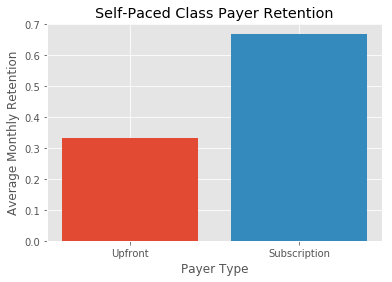

In [23]:
plt.xlabel('Payer Type')
plt.ylabel('Average Monthly Retention')
plt.title('Self-Paced Class Payer Retention')

plt.bar('Upfront', [retention_paid['pct_upfront'].mean()])
plt.bar('Subscription',[retention_paid['pct_sub'].mean()])
plt.savefig('average_monthly_retention')
plt.show()

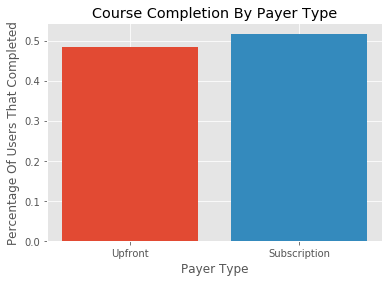

In [24]:
plt.xlabel('Payer Type')
plt.ylabel('Percentage Of Users That Completed')
plt.title('Course Completion By Payer Type')

plt.bar('Upfront', [completetion['pct_upfront'].mean()])
plt.bar('Subscription',[completetion['pct_sub'].mean()])
plt.savefig('course_completion_by_payer')
plt.show()

In [25]:
# This was calculated below but moved up due to python cannot call before a reference is made.
course_type_completion = data[data['Metric'].str.contains('completion')].drop(
    ['Cohort',
     'Number_who_paid_upfront_and_satisfy_Column_B',
     'Number_who_paid_via_subscription_and_satisfy_Column_B']
     ,axis=1
).groupby(
    ['course_type',
     'Metric']
).sum().reset_index()

course_type_completion['pct_upfront'] = course_type_completion['Number_of_students_who_paid_upfront']/course_type_completion['Number_of_students']
course_type_completion['pct_sub'] = course_type_completion['Number_of_students_who_paid_via_subscription']/course_type_completion['Number_of_students']

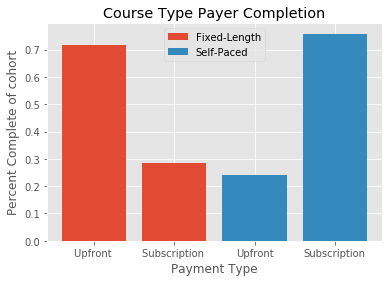

In [26]:
import matplotlib.pyplot as plt
plt.bar(
    ['Upfront','Subscription'],
    [course_type_completion[course_type_completion['course_type'] == 'Fixed_length']['pct_upfront'].mean(),
    course_type_completion[course_type_completion['course_type'] == 'Fixed_length']['pct_sub'].mean()],
    label="Fixed-Length"
)

plt.bar(
    ['Upfront','Subscription'],
    [course_type_completion[course_type_completion['course_type'] == 'Self_paced']['pct_upfront'].mean(),
    course_type_completion[course_type_completion['course_type'] == 'Self_paced']['pct_sub'].mean()],
    label="Self-Paced"
)

plt.legend()
plt.xlabel('Payment Type')
plt.ylabel('Percent Complete of cohort')

plt.title('Course Type Payer Completion')
plt.savefig('course_type_payer_completion')
plt.show()

In [27]:
# Again moved this up due to reference issues.
course_type_df = data.drop(
    ['Cohort','Number_who_paid_upfront_and_satisfy_Column_B',
     'Number_who_paid_via_subscription_and_satisfy_Column_B'],
      axis=1
).groupby(
    'course_type'
).sum().reset_index()

course_type_df['pct_upfront'] = course_type_df['Number_of_students_who_paid_upfront']/course_type_df['Number_of_students']
course_type_df['pct_sub'] = course_type_df['Number_of_students_who_paid_via_subscription']/course_type_df['Number_of_students']

course_type_df

,course_type,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,pct_upfront,pct_sub
0,Fixed_length,190,136,54,0.715789,0.284211
1,Self_paced,1415,459,956,0.324382,0.675618


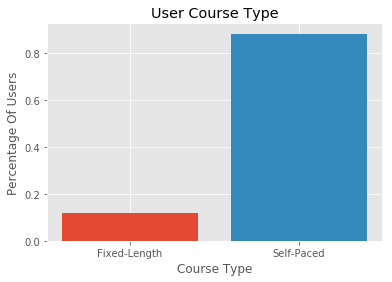

In [28]:
plt.xlabel('Course Type')
plt.ylabel('Percentage Of Users')
plt.title('User Course Type')

plt.bar('Fixed-Length', course_type_df[course_type_df['course_type'] == 'Fixed_length']['Number_of_students'].sum()/course_type_df['Number_of_students'].sum())
plt.bar('Self-Paced', course_type_df[course_type_df['course_type'] == 'Self_paced']['Number_of_students'].sum()/course_type_df['Number_of_students'].sum())
plt.savefig('course_type')
plt.show()

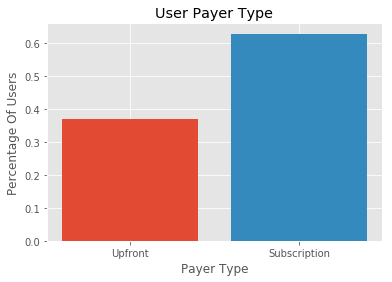

In [29]:
plt.xlabel('Payer Type')
plt.ylabel('Percentage Of Users')
plt.title('User Payer Type')

plt.bar('Upfront', data['Number_of_students_who_paid_upfront'].sum()/data['Number_of_students'].sum())
plt.bar('Subscription', data['Number_of_students_who_paid_via_subscription'].sum()/data['Number_of_students'].sum())
plt.savefig('user_type')
plt.show()


<b>3) Can you draw any conclusions around whether one option is better than the other? Does the course structure play a role?</b>


This user base preferred signing up for self-paced classes much more.
By grouping by completion and course type it further shows the type of user who finishes and signs up for each type of class. Retention rates in aggregate are higher for those who paid by subscription but when I group by course type I see it is more dependant on that variable.

- 12% of this user base signed up for fixed-length classes while 88% chose a self-paced class.
- For the fixed-length class I saw an average of 72% of upfront payers in 3 and 4 months complete the class versus 28% who paid by subscription.
- For the self-paced classes I saw an average of 24% of upfront payers in 3 and 4 months complete the class versus 76% who paid by subscription.

My conclusion is that I believe structure does play a role in how users interact with the class. This falls more inline with my hypotheses above. Those who pay for the class in full tend to finish it. On the otherhand users like more flexibility. Users are more inclined to take classes that are self-paced and will finish them more so when paying by subscription. In this dataset it seems that self-paced subscription is better.

In [30]:
# Again this data may be skewed because there are two self-paced classes vs. one fixed
# More users paid for self-paced courses, which falls inline of the assumption of freedom and felxibility.
# For fixed length classes upfront payment seems to be preferred. 

# Fixed length vs Self-paced
course_type_df = data.drop(
    ['Cohort','Number_who_paid_upfront_and_satisfy_Column_B',
     'Number_who_paid_via_subscription_and_satisfy_Column_B'],
     axis=1
).groupby(
    'course_type'
).sum().reset_index()

# Calculation percentage of those who paid upfront vs. those who paid via subscription
course_type_df['pct_upfront'] = course_type_df['Number_of_students_who_paid_upfront']/course_type_df['Number_of_students']
course_type_df['pct_sub'] = course_type_df['Number_of_students_who_paid_via_subscription']/course_type_df['Number_of_students']

course_type_df

,course_type,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,pct_upfront,pct_sub
0,Fixed_length,190,136,54,0.715789,0.284211
1,Self_paced,1415,459,956,0.324382,0.675618


In [31]:
# Percent of users who paid upfront.
data['Number_of_students_who_paid_upfront'].sum()/data['Number_of_students'].sum()

0.3707165109034268

In [32]:
# Percent of users who paid via subscription.
data['Number_of_students_who_paid_via_subscription'].sum()/data['Number_of_students'].sum()

0.6292834890965732

In [33]:
# Percent of users in fixed length classes.
course_type_df[course_type_df['course_type'] == 'Fixed_length']['Number_of_students'].sum()/course_type_df['Number_of_students'].sum()

0.11838006230529595

In [34]:
# Percent of users in self-paced classes.
course_type_df[course_type_df['course_type'] == 'Self_paced']['Number_of_students'].sum()/course_type_df['Number_of_students'].sum()

0.881619937694704

In [35]:
# This DataFrame show attributes both classes have so I will use this to compare.
course_type_completion = data[data['Metric'].str.contains('completion')].drop(
    ['Cohort','Number_who_paid_upfront_and_satisfy_Column_B',
     'Number_who_paid_via_subscription_and_satisfy_Column_B'],
     axis=1
).groupby(
    ['course_type',
     'Metric']
).sum().reset_index()

course_type_completion['pct_upfront'] = course_type_completion['Number_of_students_who_paid_upfront']/course_type_completion['Number_of_students']
course_type_completion['pct_sub'] = course_type_completion['Number_of_students_who_paid_via_subscription']/course_type_completion['Number_of_students']

In [36]:
course_type_completion

,course_type,Metric,Number_of_students,Number_of_students_who_paid_upfront,Number_of_students_who_paid_via_subscription,pct_upfront,pct_sub
0,Fixed_length,3_month_completion,109,78,31,0.715596,0.284404
1,Fixed_length,4_month_completion,81,58,23,0.716049,0.283951
2,Self_paced,3_month_completion,112,30,82,0.267857,0.732143
3,Self_paced,4_month_completion,74,16,58,0.216216,0.783784


In [37]:
# This data is very telling. It further shows the type of user who finished and signs up for each type of cla
course_type_completion.drop(['Number_of_students','Number_of_students_who_paid_upfront','Number_of_students_who_paid_via_subscription'],axis=1)

,course_type,Metric,pct_upfront,pct_sub
0,Fixed_length,3_month_completion,0.715596,0.284404
1,Fixed_length,4_month_completion,0.716049,0.283951
2,Self_paced,3_month_completion,0.267857,0.732143
3,Self_paced,4_month_completion,0.216216,0.783784


In [38]:
# Average monthly completion of cohort for fixed-length and paying upfront.
course_type_completion[course_type_completion['course_type'] == 'Fixed_length']['pct_upfront'].mean()

0.7158228564956394

In [39]:
# Average monthly completion of cohort for fixed-length and paying via subscription.
course_type_completion[course_type_completion['course_type'] == 'Fixed_length']['pct_sub'].mean()

0.28417714350436063

In [40]:
# Average monthly completion of cohort for self-paced and paying upfront.
course_type_completion[course_type_completion['course_type'] == 'Self_paced']['pct_upfront'].mean()

0.24203667953667954

In [41]:
# Average monthly completion of cohort for self-paced and paying via subscription.
course_type_completion[course_type_completion['course_type'] == 'Self_paced']['pct_sub'].mean()

0.7579633204633205

<b>4) What recommendations would you make to Springboard as a business?</b>


Based off the dataset I would like to try giving a bigger discount rate in hopes of attracting more users to pay in full. I would test these larger discount rates on a month by month basis to see if it has any effect on organic and paying users. Perhaps if paid user rates increase with a larger discount you could give only users from paid acquisition these types of discounts.

I would focus on getting more users into fixed-length classes. I would reduce the length of fixed-length classes to see if rentention and completion rates rise. Another idea would be adding an incentive or more flexibility to fixed classes. Adding an ability to refund the user up until a certain point in the class could give them that feeling. 

<b>5) What are some questions you’d want to explore further or experiments that you’d recommend that Springboard runs?</b>

<b>Questions I have right away are:</b>
- Organics vs paid acquisiton:
    - How strong is Springboard as a brand? Where should the focus be, more on paid or more on organics (reducing paid)? If organics are healthy, what could you do to retain users better?
- Sources of acquisition:
    - Knowing which sources bring in the highest LTV's and cutting out sources that don't hold their worth.
- Knowing the content of the class:
    - How can you further bucket using this information and from these buckets how can we use this information for finding new and relatable content.
    
<b>Experiments to try:</b>
- Giving users the option to choose between a fixed-length or self-pace for any given class.
    - If you have users bucketed this could give further insight to what a user is truly looking for.
- More credits for taking a future class if you finish a class. In addtion credits or additional resources could be unlocked at monthly checkpoints to increase retention.
    - By testing this you can test to see if incentives work for increasing overall retention and completion of a class.